# Q4

In [1]:
import time
from time import time
import numpy as np
from numpy import abs, log, rot90, hstack, fft, float, mean, ones, zeros, uint8
from numpy.fft import fftshift, fft2, ifft2, ifftshift
from skimage import io, util, color, measure
from skimage.io import imread
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

Part 1

2.43908337237922e+17


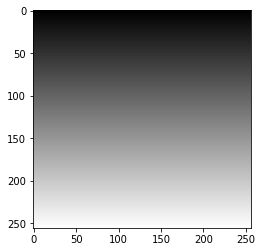

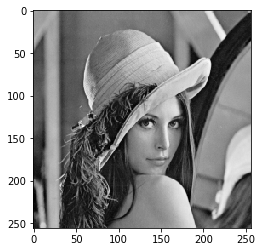

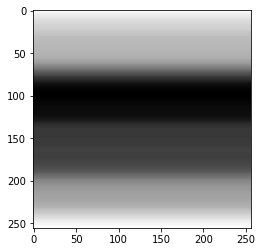

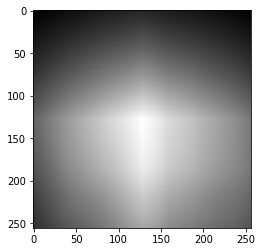

In [2]:
f = imread('./images/gradient.png')[:,:,0]
h = imread('./images/lena.png')[:, :, 0]

F = fftshift(fft2(f))
H = fftshift(fft2(h))
iDFT = abs(ifft2(ifftshift(F * H)))
conv = convolve2d(f, h.astype(float))[127:383, 127:383]
mse = mean((conv - iDFT) ** 2)
print(mse)

plt.figure()
plt.imshow(f, cmap="gray")

plt.figure()
plt.imshow(h, cmap="gray")

plt.figure()
plt.imshow(abs(iDFT), cmap="gray")

plt.figure()
plt.imshow(conv, cmap="gray")

Part 2

4.864211406732687e-15


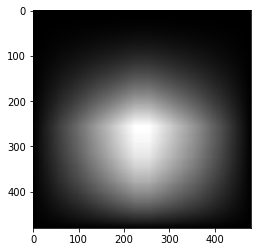

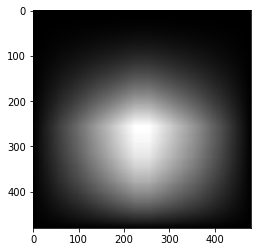

In [58]:
# 256x256 image
f = imread('./images/gradient.png')[:,:,0] 
# 225x225 image
h = imread('./images/pebbles.jpeg')[:,:,0]

M = f.shape[0] + h.shape[0] - 1
N = f.shape[1] + h.shape[1] - 1

conv = convolve2d(f, h.astype(float))
res = ifft2(ifftshift(fftshift(fft2(f, s=(M, N))) * fftshift(fft2(h, s=(M, N)))))
res = abs(res)

print(mean((res - conv) ** 2))
plt.figure()
plt.imshow(conv, cmap="gray")
plt.figure()
plt.imshow(res, cmap="gray")

Part 3

In [54]:
def conv_normal(img1, img2):
    return convolve2d(img1, img2.astype(float))

def conv_fft(img1, img2):
    M = img1.shape[0] + img2.shape[0] - 1
    N = img1.shape[1] + img2.shape[1] - 1
    res = ifft2(ifftshift(fftshift(fft2(img1, s=(M, N))) * fftshift(fft2(img2, s=(M, N)))))
    res = abs(res)
    return res

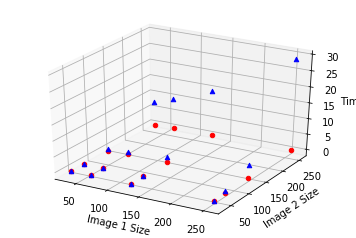

In [55]:
im_list = []
im1 = imread('./images/gradient.png')[:, :, 0]
im2 = im1[:128,:128]
im3 = im1[:64,:64]
im4 = im1[:32,:32]

im_dict = {0:im4, 1:im3, 2:im2, 3:im1}
norm_time = zeros((5,5))
fft_time = zeros((5,5))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for row in range(4):
    for col in range(4):
        
        start = time()
        res = conv_fft(im_dict[row], im_dict[col])
        end = time()
        fft_time[row][col] = end - start
        f = end - start
        
        start = time()
        res = conv_normal(im_dict[row], im_dict[col])
        end = time()
        norm_time[row][col] = end - start
        n = end - start
        
        ax.scatter((2**row)*32, (2**col)*32, f, c='r', marker='o')
        ax.scatter((2**row)*32, (2**col)*32, n, c='b', marker='^')

# print (norm_time)
# print (fft_time)

ax.set_xlabel('Image 1 Size')
ax.set_ylabel('Image 2 Size')
ax.set_zlabel('Time')

plt.show()

Observations: 2D Convolution takes much more time than performing convolution using FFT, as FFT is highly optimised. The difference is evident when Image 2 size is larger. This assymetry appears as the 2nd image acts as the filter or the window on the 1st image.

Part 4

In [61]:
cm = imread('./images/gradient.png')[:,:,0]
lena = imread('./images/lena.png')[:,:,0]

M = lena.shape[0] + lena.shape[0] - 1
N = cm.shape[1] + cm.shape[1] - 1
start = time()
res511 = ifft2(ifftshift(fftshift(fft2(lena, s=(M, N))) * fftshift(fft2(cm, s=(M, N)))))
res511 = abs(res511)
end = time()
time511 = end - start

M = lena.shape[0] + lena.shape[0]
N = cm.shape[1] + cm.shape[1]
start = time()
res512 = ifft2(ifftshift(fftshift(fft2(lena, s=(M, N))) * fftshift(fft2(cm, s=(M, N)))))
res512 = abs(res512)
end = time()
time512 = end - start

print(time511, time512)

0.13998675346374512 0.03741574287414551


4.6742067405625914e-17
4.3175846190985256e-17
0.001445361508390212
3.4991027825691445e-17


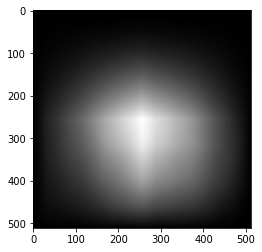

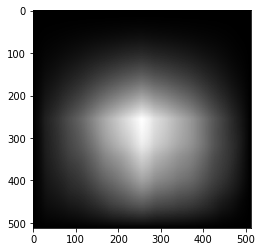

In [59]:
plt.figure()
plt.imshow(res511, cmap="gray")
plt.figure()
plt.imshow(res512, cmap="gray")

print(np.mean((res512[0, :] - np.min(res512)) / (np.max(res512) - np.min(res512))))
print(np.mean((res512[511, :] - np.min(res512)) / (np.max(res512) - np.min(res512))))
print(np.mean((res512[:, 0] - np.min(res512)) / (np.max(res512) - np.min(res512))))
print(np.mean((res512[:, 511] - np.min(res512)) / (np.max(res512) - np.min(res512))))

Result:  
All the values outside 511x511 sub-array of the convolution image are zeroes. 

In [3]:
cm = imread('./images/gradient.png')[:,:,0]
lena = imread('./images/lena.png')[:,:,0]

M = lena.shape[0] + lena.shape[0] - 1
N = cm.shape[1] + cm.shape[1] - 1
start = time()
res511 = ifft2(ifftshift(fftshift(fft2(lena, s=(M, N))) * fftshift(fft2(cm, s=(M, N)))))
res511 = abs(res511)
end = time()
time511 = end - start

M = lena.shape[0] + lena.shape[0] - 2
N = cm.shape[1] + cm.shape[1] - 2
start = time()
res512 = ifft2(ifftshift(fftshift(fft2(lena, s=(M, N))) * fftshift(fft2(cm, s=(M, N)))))
res512 = abs(res512)
end = time()
time512 = end - start

print(time511, time512)

0.1328144073486328 0.049536943435668945
